### Задача 1 (1 балл)

Руководитель продукта, у которого имеется АБ-платформа, хочет выяснить, стоит ли инвестировать ресурсы в ускорение своего продукта. Как ему сделать это с минимальными трудозатратами?

### Задача 2 (2 балла)

Аналитик решил протестировать два вида баннеров A и B. По ходу АБ-эксперимента по n пользователей увидело баннер А и B. В группе A конверсия составила 56%, а в группе B 59%. При каких n можно считать, что в группе B на уровне значимости в 0.1% действительно выше конверсия?

<b>Решение:</b>

Будем использовать критерий Стьюдента. Пусть $p_A = 0.56, p_B = 0.59$ – конверсии из условия, $n_A = n_B = n$ – количество пользователей в группах. Тогда, зная, что величина
$$t = \frac{{p_B - p_A}}{\sqrt{\frac{p_A(1-p_A)}{n_A} + \frac{p_B(1-p_B)}{n_B}}}$$
будет иметь распределение Стьюдента с $n_A + n_B - 2$ степенями свободы (обозначим квантиль $t_{1-\alpha}$, мы мы можем найти соответствующий квантиль распределения Стьюдента. Тогда можно считать, что в группе B на уровне значимости в 0.1% действительно выше конверсия при таких $n$, при которых $t \geq t_{1-\alpha}$. При этом, тк $t_{1-\alpha}$ убывает с ростом $n$, а $t$ с ростом $n$ возрастает, нам достаточно найти минимальное $n_{min}$, при котором выполняется неравенство выше, и тогда ответом будут $n > n_{min}$ (тут не забываем, что $n \in \mathbb{Z} $).

In [97]:
# пример нахождения квантиля при фиксированном n

from scipy import stats
import numpy as np

n = 7000
n_B = n_A = n
p_A = 0.56
p_B = 0.59

alpha = 0.001  # уровень значимости 0.1%
df = n_A + n_B - 2  # степени свободы
critical_value = stats.t.ppf(1 - alpha, df)
critical_value

3.090814641930652

In [91]:
# пример нахождения t-статистики при фиксированном n
n = 7000
n_B = n_A = n
t = (p_B - p_A) / np.sqrt(p_B*(1 - p_B)/n_B + p_A*(1 - p_A)/n_A)
t                               

3.591922127060185

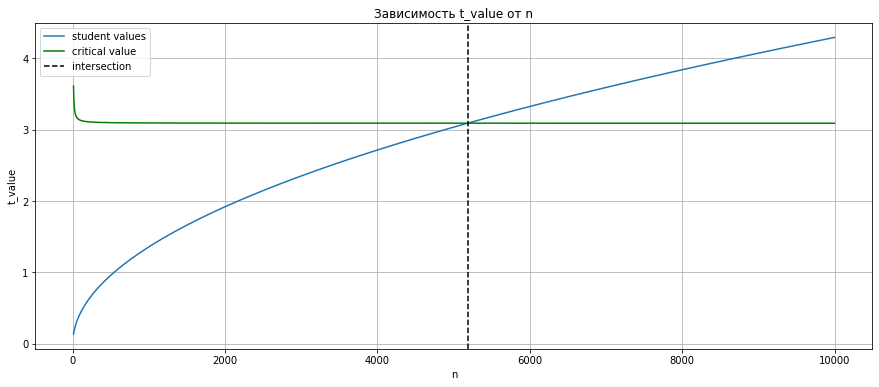

Точка пересечения n: [5183.79115122]


In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def equation(x): # находим пересечение функций f(x) = g(x), те решения ур-ия f(x) - g(x) = 0
    return (p_B - p_A) / np.sqrt(p_B*(1 - p_B)/x + p_A*(1 - p_A)/x) - stats.t.ppf(1 - alpha, x + x - 2)

n = np.arange(10, 10000)  
n_A = n_B = n
critical_value = stats.t.ppf(1 - alpha, n_A + n_B - 2)

student_values = (p_B - p_A) / np.sqrt(p_B*(1 - p_B)/n_B + p_A*(1 - p_A)/n_A)
critical_values = stats.t.ppf(1 - alpha, n_A + n_B - 2)

intersection = fsolve(equation, 500)  

plt.figure(figsize=(15, 6))
plt.plot(n, student_values, label='student values')
plt.plot(n, critical_values, 'g', label='critical value')
plt.axvline(intersection, color='black', linestyle='--', label='intersection')
plt.xlabel('n')
plt.ylabel('t_value')
plt.title('Зависимость t_value от n')
plt.grid(True)
plt.legend()
plt.show()

print("Точка пересечения n:", intersection)

<b>Вывод:</b> при $n \geq 5184$ можно считать, что в группе B на уровне значимости в 0.1% конверсия действительно выше 

### Задача 3 (3 балла)

Аналитик собирается провести эксперимент с добавлением фичи на 14 дней с p-value 5%. То есть в 5% случаев, если на самом деле нет изменений, то фичу будут выкатывать. Аналитик очень нетерпеливый, и любит [подглядывать](https://gopractice.ru/data/how-not-to-analyze-abtests) (рассчитывает стат. значимость каждый день эксперимента). Как только в какой-то день p-value оказывается ниже 5%, он собирается остановить эксперимент и выкатить фичу.

* Посчитайте 99% доверительный интервал для количества AA экспериментов из 1000, которые должны иметь p-value 5%. (1 балл)
* Посчитайте на синтетическом примере в какой доле AA экспериментов аналитик отвергнет нулевую гипотезу, если будет подглядывать. Другими словами какая реальная ошибка первого рода. (1 балл) 
* Какое p-value нужно использовать при "подглядывании", чтобы итоговая ошибка первого рода составила 5%? (1 балл)

0.063

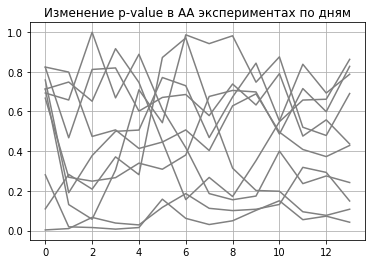

In [107]:
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np

p_value_bound = 0.05
np.random.seed(182)

def generate_p_values_by_day(N=1000, samples_per_day=100, days=14):
    data = []

    for i in range(N):
        test = np.array([])
        control = np.array([])
        p_values = []
        for day in range(days):
            test = np.hstack([test, np.random.randn(samples_per_day)])
            control = np.hstack([control, np.random.randn(samples_per_day)])
            p_value = ttest_ind(test, control, equal_var=False).pvalue
            p_values.append(p_value)
        data.append(p_values)
        
    return pd.DataFrame(data).T

df = generate_p_values_by_day()
df[list(range(10))].plot(legend=False, color='grey', grid=True, title='Изменение p-value в AA экспериментах по дням')
(df.loc[13] < p_value_bound).sum() / df.shape[1]

В примере выше запускается 1000 AA экспериментов. В 0.063 доле случаев на 14 день p-value оказывается меньше 5%.

### Задача 4 (3 балла)

Будем называть чувствительностью метрики долю экспериментов со стат. значимым изменением метрики. В синтетическом примере ниже среди 1000 AB тестов метрика количества действий на пользователя прокрашивается в 15.8% случаев на уровне значимости 5%. В сгенерированных данных также присутствуют данные до эксперимента по каждому пользователю (time_interval = 'before_exp').

* Проверьте, что в AA тестах (когда эффект нулевой) красятся около 5% экспериментов. (1 балл)
* Постройте корректную метрику с большей чувствительностью и оцените чувствительность. (2 балл)

In [2]:
def generate_data(N=50, effect=1):
    hidden_users_param_control = 5 * np.random.exponential(size=N)
    hidden_users_param_test = 5 * np.random.exponential(size=N)

    return (
        pd.DataFrame({
            'sample_group': np.hstack([
                np.repeat('control', N), 
                np.repeat('control', N), 
                np.repeat('test', N), 
                np.repeat('test', N), 
            ]),
            'time_interval': np.hstack([
                np.repeat('before_exp', N), 
                np.repeat('exp', N), 
                np.repeat('before_exp', N), 
                np.repeat('exp', N), 
            ]),
            'user_id': np.hstack([
                np.arange(N),
                np.arange(N),
                np.arange(N, 2 * N),
                np.arange(N, 2 * N)
            ]),
            'actions': np.random.poisson(np.hstack([
                hidden_users_param_control,
                hidden_users_param_control,
                hidden_users_param_test,
                hidden_users_param_test + effect,
            ]))
        })
    )

def calc_sensitivity(exp_count=1000, p_value=0.05, effect=1, seed=182):
    np.random.seed(seed)
    p_values = []
    for _ in range(exp_count):
        data = generate_data(effect=effect)
        test_metric = data.query('time_interval == "exp" and sample_group == "test"')['actions']
        control_metric = data.query('time_interval == "exp" and sample_group == "control"')['actions']
        p_values.append(ttest_ind(test_metric, control_metric, equal_var=False).pvalue)
    return sum(p < p_value for p in p_values) / exp_count

calc_sensitivity(effect=1)

0.158